<a href="https://colab.research.google.com/github/vmunozq0811/20230605-ValeriaMunoz/blob/main/Parkinson_LinearRegression_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression with TensorFlow**

https://www.tensorflow.org/tutorials/keras/regression?hl=es-419

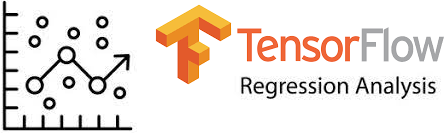

**Step 1: Load required libraries**

In [109]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

**Step 2: Load dataset**

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
raw_dataset = pd.read_csv('/content/drive/MyDrive/Parkinson_Regression_Data.csv', decimal=",", sep=";")

dataset = raw_dataset.copy()

dataset.head(5876)

,subject_id,age,sex,test_time,Jitter_percent,Jitter_Abs,Jitter_RAP,Jitter_PPQ5,Jitter_DDP,Shimmer,...,Shimmer_APQ3,Shimmer_APQ5,Shimmer_APQ11,Shimmer_DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398
1,1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894
2,1,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389
3,1,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810
4,1,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,...,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367,33.485
5871,42,61,0,149.8400,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,...,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621,32.988
5872,42,61,0,156.8200,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,...,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157,32.495
5873,42,61,0,163.7300,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,...,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204,32.007


**Step 3: Basic statistics**

In [112]:
train_stats = dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
subject_id,5875.0,21.494128,12.372279,1.000000,10.000000,22.000000,33.000000,42.000000
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
sex,5875.0,0.317787,0.465656,0.000000,0.000000,0.000000,1.000000,1.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
Jitter_percent,5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter_Abs,5875.0,0.000044,0.000036,0.000002,0.000022,0.000034,0.000053,0.000446
Jitter_RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter_PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560
Jitter_DDP,5875.0,0.008962,0.009371,0.000980,0.004730,0.006750,0.009870,0.172630
Shimmer,5875.0,0.034035,0.025835,0.003060,0.019120,0.027510,0.039750,0.268630


In [113]:
#Delete Id, because is not necessary
dataset.drop(['subject_id'], axis=1, inplace=True)
print("\nParkinson dataset:\n")
print(dataset.head())


Parkinson dataset:

   age  sex  test_time  Jitter_percent  Jitter_Abs  Jitter_RAP  Jitter_PPQ5  \
0   72    0     5.6431         0.00662    0.000034     0.00401      0.00317   
1   72    0    12.6660         0.00300    0.000017     0.00132      0.00150   
2   72    0    19.6810         0.00481    0.000025     0.00205      0.00208   
3   72    0    25.6470         0.00528    0.000027     0.00191      0.00264   
4   72    0    33.6420         0.00335    0.000020     0.00093      0.00130   

   Jitter_DDP  Shimmer  Shimmer_dB  Shimmer_APQ3  Shimmer_APQ5  Shimmer_APQ11  \
0     0.01204  0.02565       0.230       0.01438       0.01309        0.01662   
1     0.00395  0.02024       0.179       0.00994       0.01072        0.01689   
2     0.00616  0.01675       0.181       0.00734       0.00844        0.01458   
3     0.00573  0.02309       0.327       0.01106       0.01265        0.01963   
4     0.00278  0.01703       0.176       0.00679       0.00929        0.01819   

   Shimmer_DDA   

**Correlation**

                     age       sex  test_time  Jitter_percent  Jitter_Abs  \
age             1.000000 -0.041602   0.019884        0.023071    0.035685   
sex            -0.041602  1.000000  -0.009805        0.051422   -0.154661   
test_time       0.019884 -0.009805   1.000000       -0.022837   -0.011349   
Jitter_percent  0.023071  0.051422  -0.022837        1.000000    0.865574   
Jitter_Abs      0.035685 -0.154661  -0.011349        0.865574    1.000000   
Jitter_RAP      0.010255  0.076718  -0.028888        0.984181    0.844622   
Jitter_PPQ5     0.013199  0.087995  -0.023290        0.968214    0.790534   
Jitter_DDP      0.010258  0.076703  -0.028876        0.984184    0.844626   
Shimmer         0.101554  0.058736  -0.033870        0.709791    0.649041   
Shimmer_dB      0.111130  0.056481  -0.030962        0.716704    0.655866   
Shimmer_APQ3    0.098912  0.044937  -0.029020        0.664149    0.623825   
Shimmer_APQ5    0.089983  0.064819  -0.036504        0.694002    0.621397   

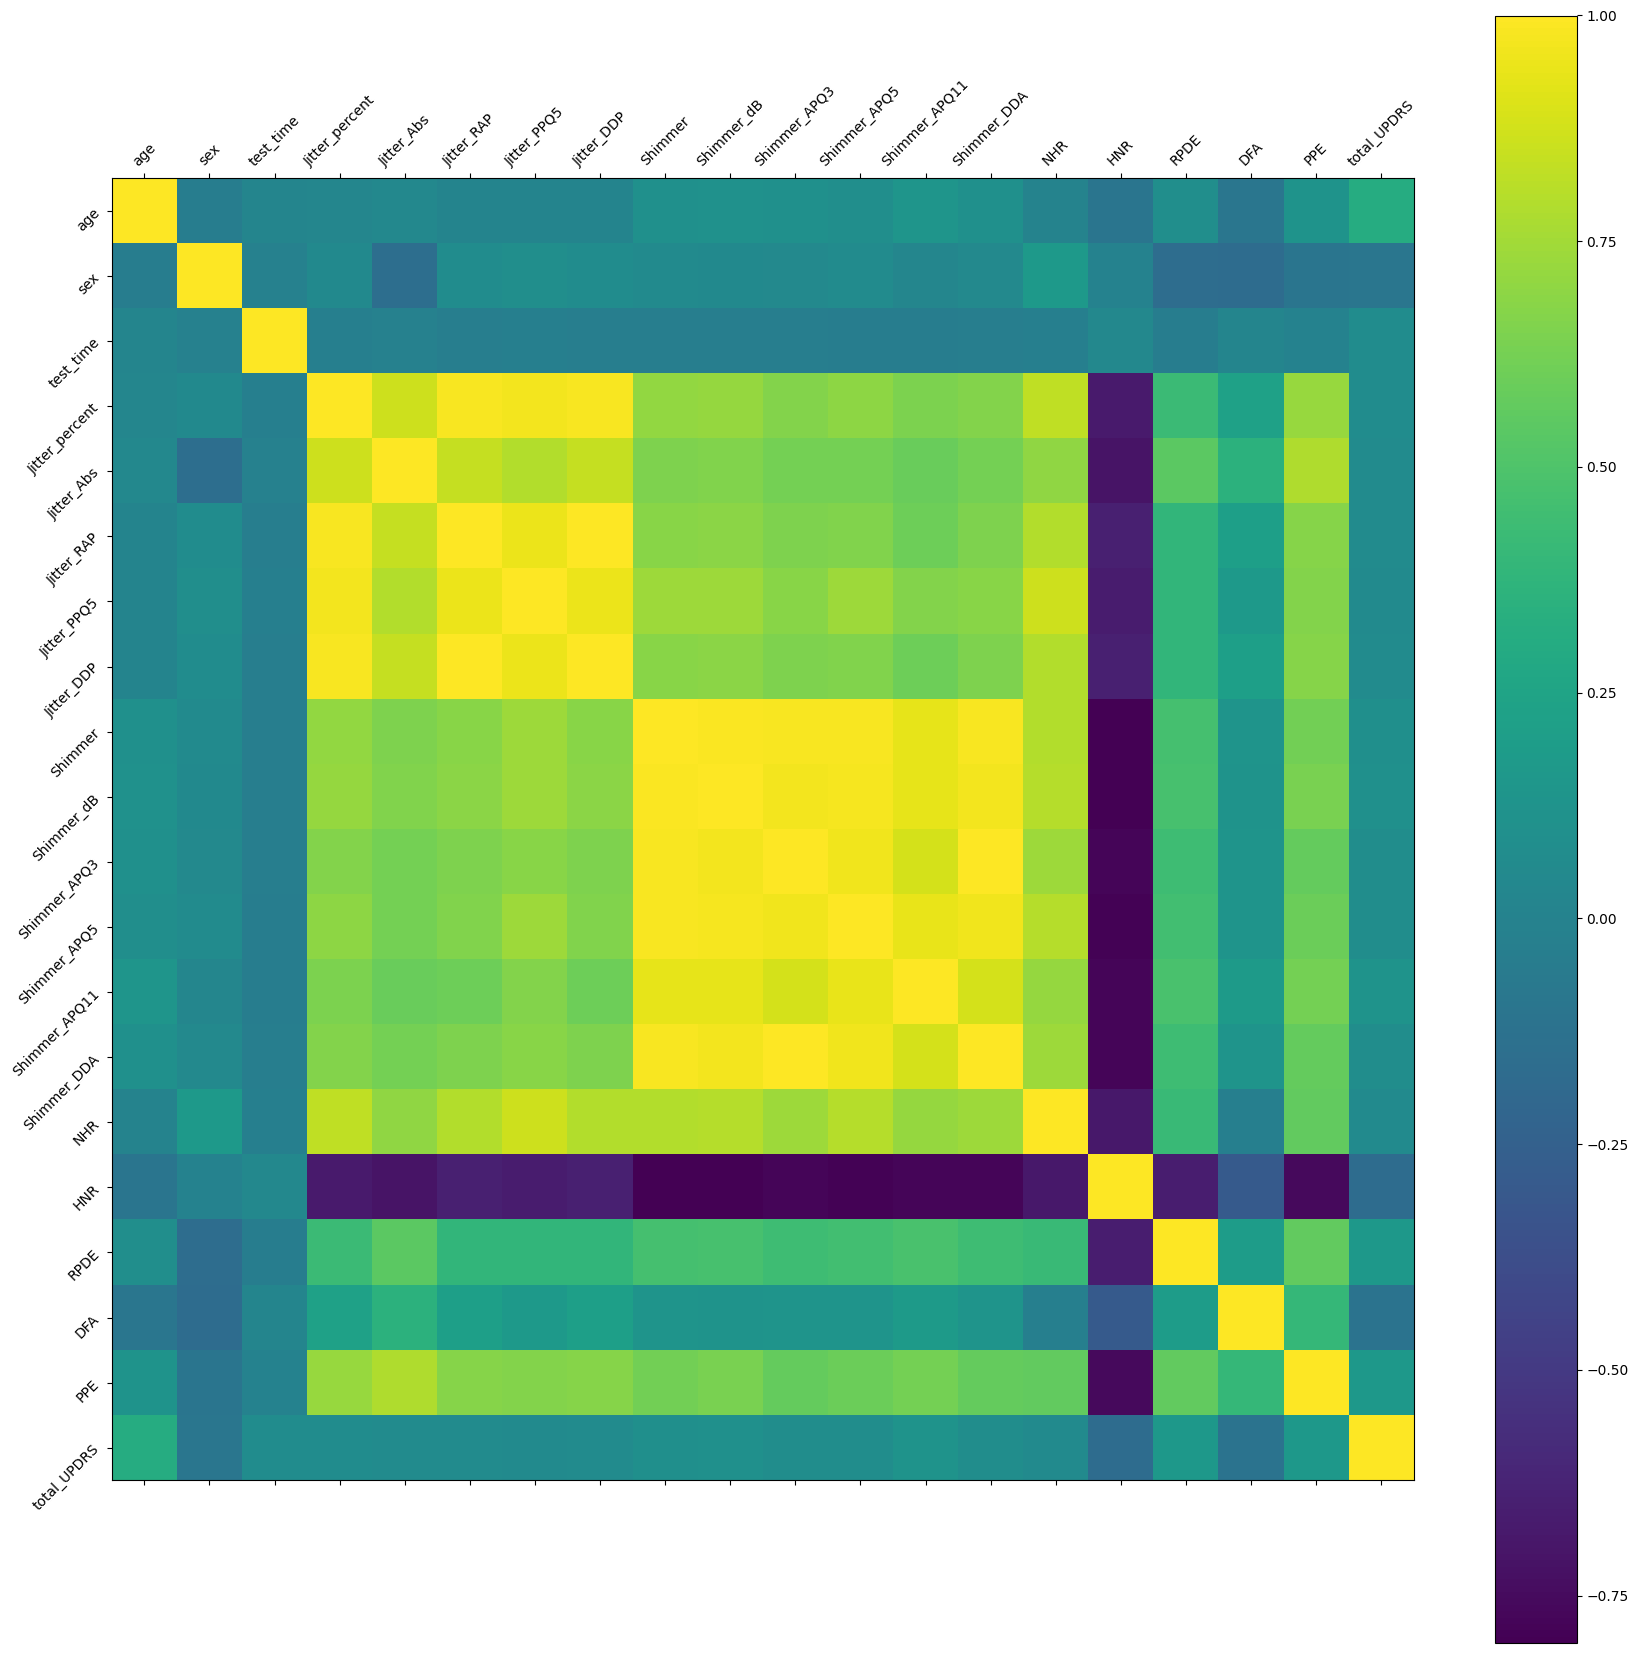

In [114]:
#Correlation Analysis
corr = dataset.corr()
print(corr)

#Correlation plot
f = plt.figure(figsize=(21,21))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(len(corr.columns)), corr.columns,fontsize=10, rotation=45);
plt.yticks(range(len(corr.columns)), corr.columns,fontsize=10, rotation=45);
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

In [135]:
#Split X and Y
Y = dataset['total_UPDRS']
X = dataset.drop(['total_UPDRS'], axis=1)

print("\nX:\n")
print(X[:10]) #Print just  5 records

print("\nY:\n")
print(Y[:10])  #Print just 5 records


X:

   age  sex  test_time  Jitter_percent  Jitter_Abs  Jitter_RAP  Jitter_PPQ5  \
0   72    0     5.6431         0.00662    0.000034     0.00401      0.00317   
1   72    0    12.6660         0.00300    0.000017     0.00132      0.00150   
2   72    0    19.6810         0.00481    0.000025     0.00205      0.00208   
3   72    0    25.6470         0.00528    0.000027     0.00191      0.00264   
4   72    0    33.6420         0.00335    0.000020     0.00093      0.00130   
5   72    0    40.6520         0.00353    0.000023     0.00119      0.00159   
6   72    0    47.6490         0.00422    0.000024     0.00212      0.00221   
7   72    0    54.6400         0.00476    0.000025     0.00226      0.00259   
8   72    0    61.6690         0.00432    0.000029     0.00156      0.00207   
9   72    0    68.6880         0.00496    0.000027     0.00258      0.00253   

   Jitter_DDP  Shimmer  Shimmer_dB  Shimmer_APQ3  Shimmer_APQ5  Shimmer_APQ11  \
0     0.01204  0.02565       0.230       0.0

**Drop unnecesary attributes**

In [139]:
#Remove low variance attributes
from sklearn.feature_selection import VarianceThreshold
import numpy as np

attributes = X.columns

selector = VarianceThreshold(threshold=0.0001)
X = selector.fit_transform(X)

#Selected Features
cols = selector.get_support(indices=True)
attributes = attributes[cols]
print("\nSelected Features:")
print(attributes)

print("\nFiltered Dataset:")
print(X[:10]) #Print just  5 records


Selected Features:
Index(['age', 'sex', 'test_time', 'Shimmer', 'Shimmer_dB', 'Shimmer_APQ3',
       'Shimmer_APQ5', 'Shimmer_APQ11', 'Shimmer_DDA', 'NHR', 'HNR', 'RPDE',
       'DFA', 'PPE'],
      dtype='object')

Filtered Dataset:
[[7.2000e+01 0.0000e+00 5.6431e+00 2.5650e-02 2.3000e-01 1.4380e-02
  1.3090e-02 1.6620e-02 4.3140e-02 1.4290e-02 2.1640e+01 4.1888e-01
  5.4842e-01 1.6006e-01]
 [7.2000e+01 0.0000e+00 1.2666e+01 2.0240e-02 1.7900e-01 9.9400e-03
  1.0720e-02 1.6890e-02 2.9820e-02 1.1112e-02 2.7183e+01 4.3493e-01
  5.6477e-01 1.0810e-01]
 [7.2000e+01 0.0000e+00 1.9681e+01 1.6750e-02 1.8100e-01 7.3400e-03
  8.4400e-03 1.4580e-02 2.2020e-02 2.0220e-02 2.3047e+01 4.6222e-01
  5.4405e-01 2.1014e-01]
 [7.2000e+01 0.0000e+00 2.5647e+01 2.3090e-02 3.2700e-01 1.1060e-02
  1.2650e-02 1.9630e-02 3.3170e-02 2.7837e-02 2.4445e+01 4.8730e-01
  5.7794e-01 3.3277e-01]
 [7.2000e+01 0.0000e+00 3.3642e+01 1.7030e-02 1.7600e-01 6.7900e-03
  9.2900e-03 1.8190e-02 2.0360e-02 1.1625e-02 2.6126e

In [128]:
#Remove attributes X with low correlation respect to Y
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression

selector = SelectKBest(f_regression, k=10)
X =selector.fit_transform(X, Y)

#Selected features
cols = selector.get_support(indices=True)
attributes = attributes[cols]
print("\nSelected Features:")
print(attributes)

print("\nNew X dataset:\n")
print(X[:5]) #Print just  5 records

print("\nY:\n")
print(Y[:5]) #Print just  5 records


Selected Features:
Index(['age', 'sex', 'Shimmer', 'Shimmer_dB', 'Shimmer_APQ5', 'Shimmer_APQ11',
       'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

New X dataset:

[[0.73469388 0.         0.08506232 0.09802979 0.06754301 0.05176393
  0.55171747 0.32863838 0.0977927  0.19454397]
 [0.73469388 0.         0.06469104 0.07352235 0.05318633 0.05275305
  0.70477137 0.34833018 0.14429969 0.12133479]
 [0.73469388 0.         0.0515495  0.07448342 0.03937485 0.04429058
  0.5905677  0.38181238 0.08536238 0.26510433]
 [0.73469388 0.         0.07542268 0.144642   0.06487764 0.06279078
  0.62916943 0.41258312 0.18176129 0.4378842 ]
 [0.73469388 0.         0.05260383 0.07208073 0.04452387 0.05751548
  0.67558538 0.39366427 0.13420184 0.24181434]]

Y:

0    34.398
1    34.894
2    35.389
3    35.810
4    36.375
Name: total_UPDRS, dtype: float64


**Step 4: Standarize Data**

In [138]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(X)

normed_train_data

KeyError: "None of [Index(['age', 'sex', 'test_time', 'Jitter_percent', 'Jitter_Abs', 'Jitter_RAP',\n       'Jitter_PPQ5', 'Jitter_DDP', 'Shimmer', 'Shimmer_dB', 'Shimmer_APQ3',\n       'Shimmer_APQ5', 'Shimmer_APQ11', 'Shimmer_DDA', 'NHR', 'HNR', 'RPDE',\n       'DFA', 'PPE'],\n      dtype='object')] are in the [columns]"

**Step 5: Split Dataset**

In [122]:
train_labels = normed_train_data.pop('total_UPDRS')

print("\nX normalized data:\n")
print(normed_train_data.head())

print("\nY normalized data:\n")
print(train_labels.head())

KeyError: 'total_UPDRS'

**Step 6: Build TensorFlow Model**

In [123]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Step 7: Describe model**

Step 7A: Plot model

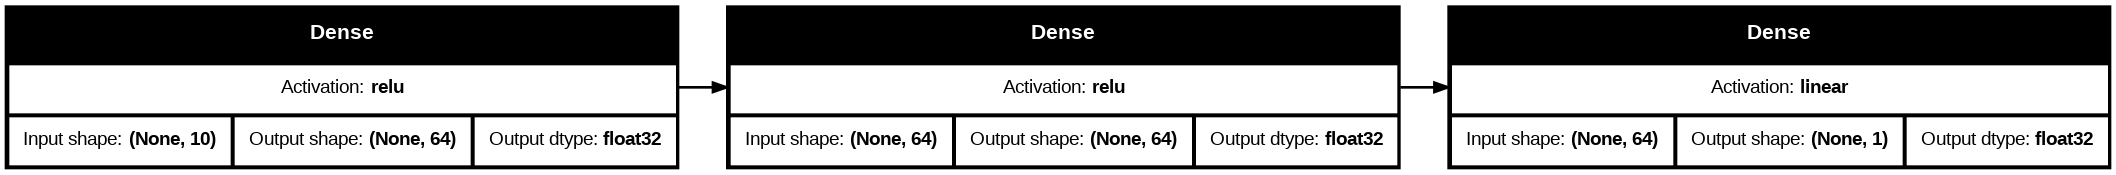

In [124]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

Step 7B: Model summary

In [125]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,929 (19.25 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

**Step 8: Predict data before model train**

In [126]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


array([[0.29358968],
       [0.16924092],
       [0.27587134],
       [0.12863772],
       [0.19044   ],
       [0.32444483],
       [0.43689328],
       [0.23159122],
       [0.18638638],
       [0.21519113]], dtype=float32)

**Step 9: Train model**

In [127]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.01, verbose=0,
  callbacks=[PrintDot()])

print("FINISH TRAIN MODEL.")

NameError: name 'train_labels' is not defined

**Step 10: Print model train history**

In [35]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,0.012890,0.083765,0.012890,0.008056,0.067235,0.008056,95
96,0.012662,0.083122,0.012662,0.013419,0.095805,0.013419,96
97,0.012320,0.083327,0.012320,0.005917,0.061411,0.005917,97
98,0.012532,0.082524,0.012532,0.007233,0.065180,0.007233,98
99,0.011773,0.081186,0.011773,0.014549,0.089296,0.014549,99


**Step 11: Plot model train history**

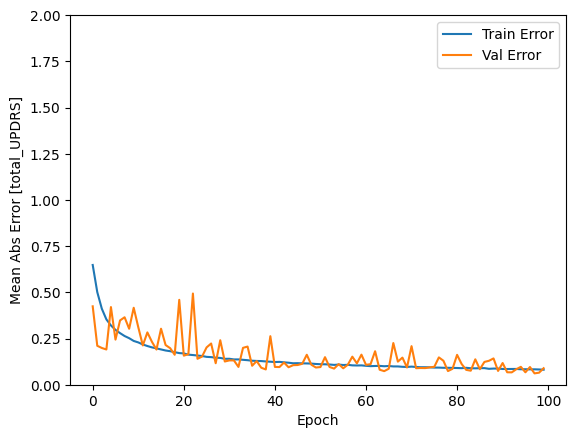

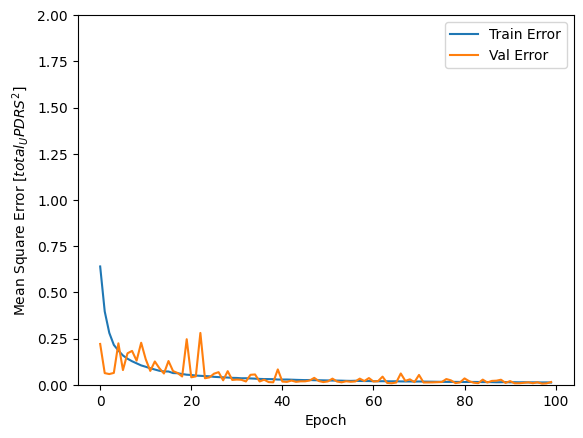

In [39]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [total_UPDRS]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,2])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$total_UPDRS^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,2])
  plt.legend()
  plt.show()


plot_history(history)

**Step 12: Predict (with train data 😠)**

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


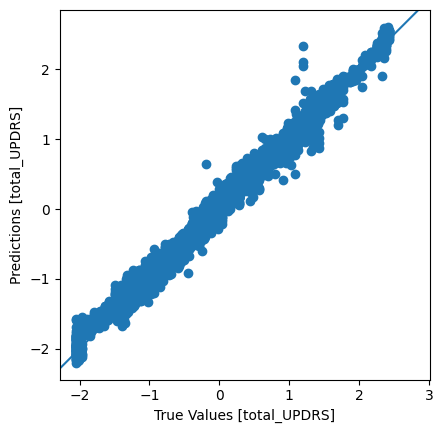

In [43]:
test_predictions = model.predict(normed_train_data).flatten()

plt.scatter(train_labels, test_predictions)
plt.xlabel('True Values [total_UPDRS]')
plt.ylabel('Predictions [total_UPDRS]')
plt.axis('equal')
plt.axis('square')

_ = plt.plot([-100, 100], [-100, 100])

**Step 13: Apply inverse standarization**

In [44]:
def inv_norm(x):
  return (x * train_stats['std'].iloc[21]) + train_stats['mean'].iloc[21]

Y_predict = inv_norm(test_predictions)

Y_predict


IndexError: single positional indexer is out-of-bounds